# Projects in AI and ML Homework 1



### Derive the objective function for Logistic Regression using Maximum Likelihood Estimation (MLE).

The objective function for logisitic regression using MLE is derived by maximizing the likelihood of observing the training data given the model parameters.

We define $y_i$ as the true labelf or the ith data point, $x_i$ as the feature vector for the ith data point, $\theta$ as the model parameters weights, and the sigmoid function $\sigma(z) = \frac{1}{1+e^{-z}}$

The probability of observing $y_i$ given $x_i$ and $\theta$ is $$P(y_i |x_i, \theta) = \sigma(\theta^T * x_i)^{y_i} * (1-\sigma(\theta^T * x_i))^{1-y_i}$$

The likelihood function is the product of the probabilities for all of the data points: $$L(\theta) = \prod_{i=1}^{n} P(y_i | x_i, \theta)$$

We want to maximize the log likelihood.
$$\log(L(\theta)) = \sum_{i=1}^{n} [y_i * \log(\sigma(\theta^T * x_i)) + (1-y_i) * log(1-\sigma(\theta^T * x_i))]$$

The objective function of logistic regression is to maximize the log likelihood. Alternatively, the objective function is the minimize the negative log likelihood.

### Do some research on the MAP technique for Logistic Regression, include your research on how this technique is different from MLE (include citations).

The MAP technique builds on MLE by incorporating prior knowledge about the parameters. It maximizes the posterior probability of the paramters given the data using Bayes Theorem: $$P(A|B) = \frac{P(B|A)*P(A)}{P(B)}$$
In this case, $$P(\theta|y,X) = \frac{P(y|X,\theta) * P(\theta)}{P(y|X)}$$
where $P(\theta|y,X)$ is the posterior probability of the parameters given the data. $P(y|X,\theta)$ is the likelihood of the data given the parameters. $P(\theta)$ is the prior distribution over the parameters. $P(y|X)$ is the marginal likelihood that doesn't depend on the parameters $\theta$.

The objective is the maximize the posterior probability:
$max(P(\theta | y,X)$

This technique is different from MLE in that in MAP, prior knowledge is incorporated into the problem, whereas MLE does not do this. MLE is informed solely by the likelihood, but MAP is informed by the likelihood and the prior probabilities.


### Define a machine learning problem you wish to solve using Logistic Regression. Justify why logistic regression is the best choice and compare it briefly to another linear classification model (cite your work if this other technique was not covered in class).

Using machine learning in topics in healthcare would be interesting, specifically in regards to predicting someones risk for a disease. A machine learning problem that I would be interested in is using Logistic Regression to predict a person's risk for a disease, an example being heart disease. I would aim to predict the likelihood of a patient developing a heart disease in the future. The model would be trained on a dataset using various features of the patient including age, gender, blood pressure, cholesterol levels, family history of heart disease, and other factors of one's health that might play a role in heart disease. The target variable would be binary with 1 indicating the person is at risk for heart disease in the future and 0 indicating that they are unlikely to develop heart disease in the future. Logistic regression would be useful for this problem because it is designed for binary classification tasks, in which this would give a yes or no answer to determine a person's risk for heart disease. While other methods might provide more specific results, such has high, medium or low likelihood for heart disease, I think a binary option using logistic regression is straightforward and would provide a more direct answer to the problem. Additionally, logistic regression would allow analysis of which factors might be strong indicators of heart disease, and logistic regression can efficiently predict outcomes for large datasets of patient information.

Another linear classification model that could be used is Linear Discriminant Analysis (LDA). However, LDA assumes the data is normally distributed and finds a linear combination of features to maximize the separation of classes. This would be more subject to outliers in the data as it makes the normality assumption, whereas Logistic Regression might give more better results.


### Discuss how your dataset corresponds to the variables in your equations, highlighting any assumptions in your derivation from part 1.

I found a dataset that is for predicting heart disease. It has many features that are used to predict if someone might have a heart disease. From my equations, $y_i$ is the target variable, which describes if a perosn would have a heart disease or not (1 for yes, 0 for no). $X$ describes the features, which include Age, Sex, Chest Pain Type, Resting blood pressure, cholesterol, fasting blood sugar, resting ECG, maximum heart rate, excercise-induced angina, oldpeak, and ST slope. These are the features $x_i$. $\theta$ is described by the weights of each feature, which is determined in the model. The model estimates the optimal values of $\theta$ that maximize the likelihood of the observed data. Each element of $\theta$ corresponds to the weight of a feature in $X$.

### Select a data set

I selected a dataset from kaggle: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download

This dataset is for predicting heart failure/disease. It has 11 features, which I listed above. The target variable is HeartDisease which is 1 if a the person has heart disease and 0 if they don't.

## Dataset and Advanced EDA


In [49]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
import warnings
#warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read data
data_path = "/content/drive/My Drive/Projects in AI and ML/heart.csv"
df = pd.read_csv(data_path)

In [5]:
# Print the size of the dataset
df.shape

(918, 12)

In [6]:
# Show the first few rows of the data
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
# Determine if any features are missing data
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


From the above, there are no attributes that are missing data, and therefore, nothing needs to be done to fill in missing data points.

In [8]:
# Print info about the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
# Print information about attributes
# Note: this only describes the numerical attributes as it is calculating mean, standard deviation, and other numeric related statistics
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
# This describes the categorical attributes
df.describe(include=['O'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


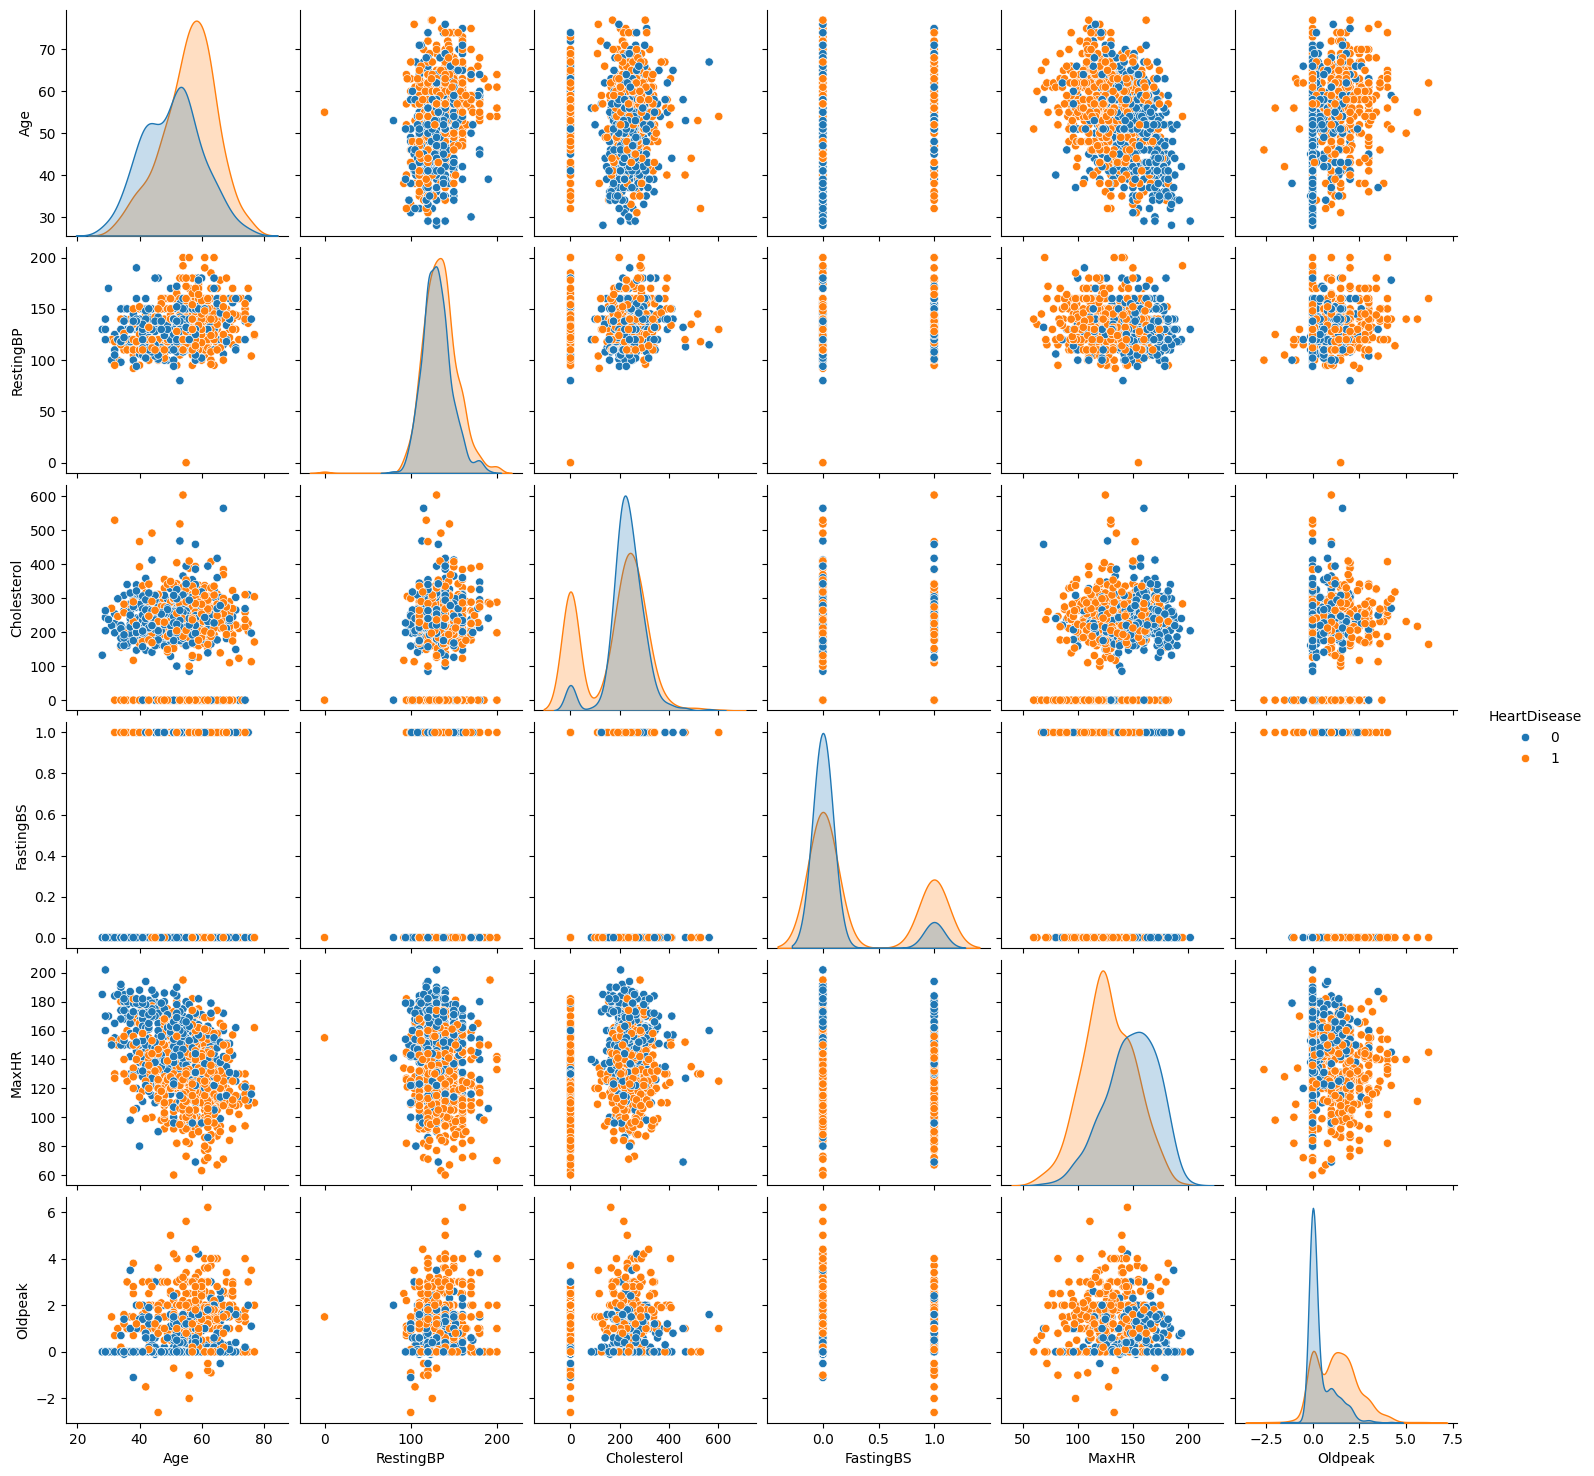

In [11]:
# Create pairplots with KDE to visualize relationships between attributes
sns.pairplot(df, hue='HeartDisease')

In [12]:
# Show the number of unique values for each attribute
df.nunique()

,0
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


In [13]:
# Determine the proportion of individuals that have heart disease, which is the target variable
df.HeartDisease.value_counts(normalize=True) #normalizes the result

,proportion
HeartDisease,
1,0.553377
0,0.446623


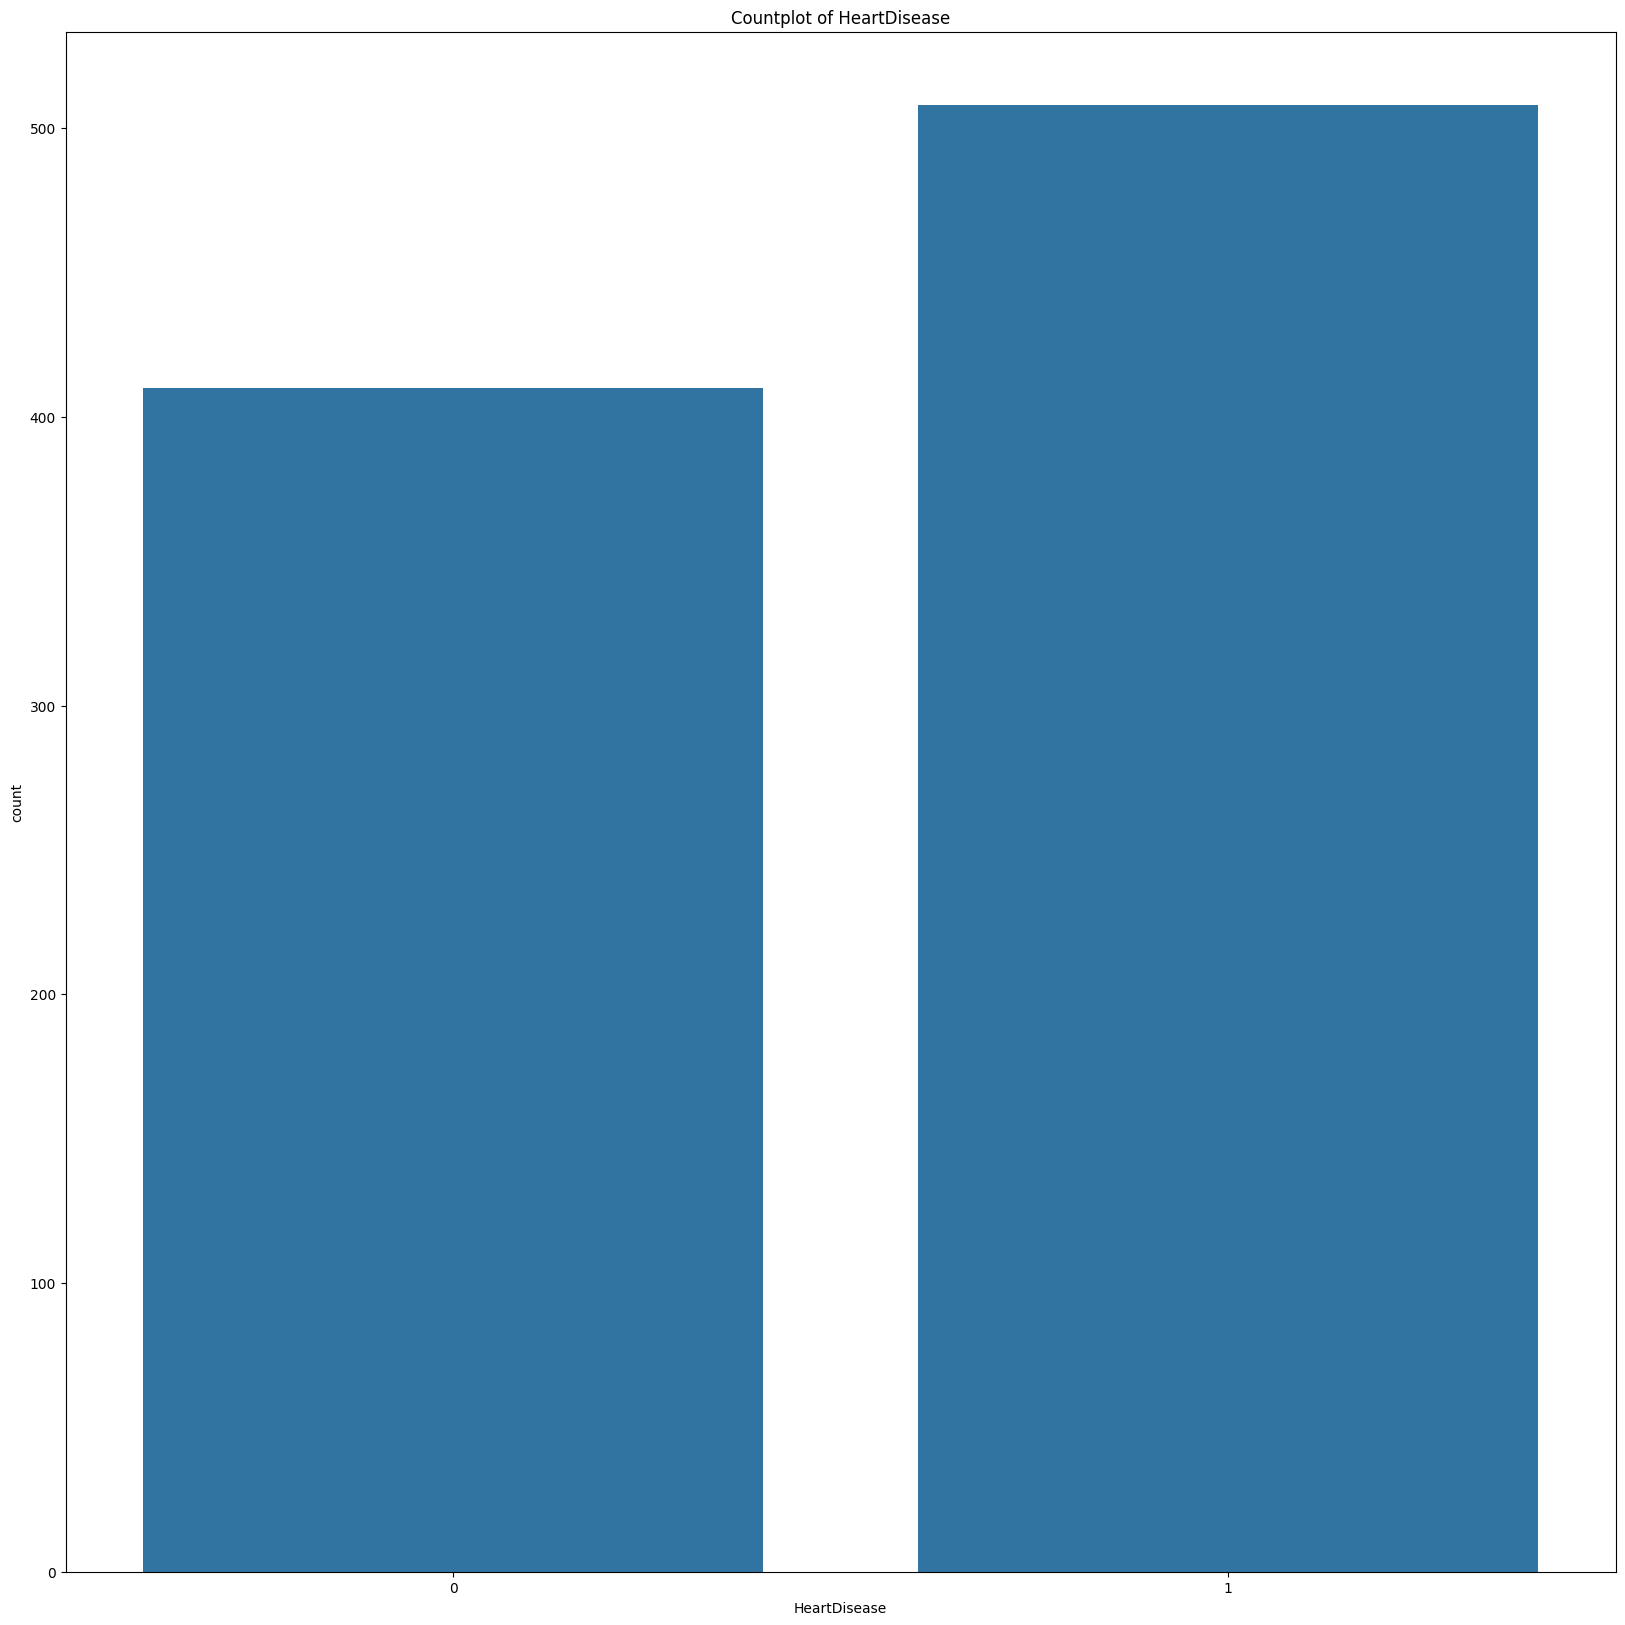

In [15]:
# Visualize the proportion of people with Heart Disease
plt.figure(figsize=(20, 20))
sns.countplot(x='HeartDisease', data=df)
plt.title('Countplot of HeartDisease')
plt.show()

In [16]:
# Show description of numeric attributes in sorted order
df.describe().T.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0


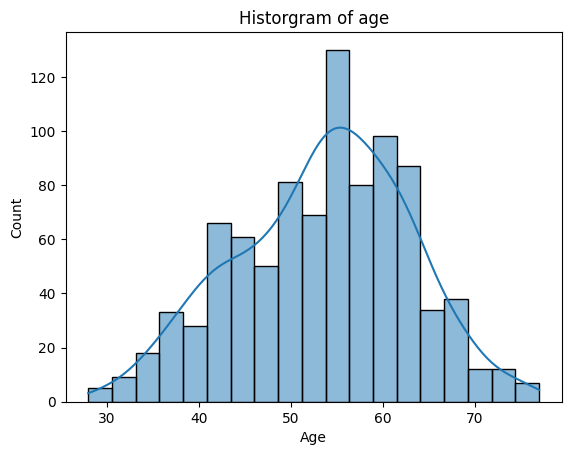

In [19]:
# Show distribution of the Age attribute
sns.histplot(df['Age'], kde=True)
plt.title("Historgram of age")
plt.show()

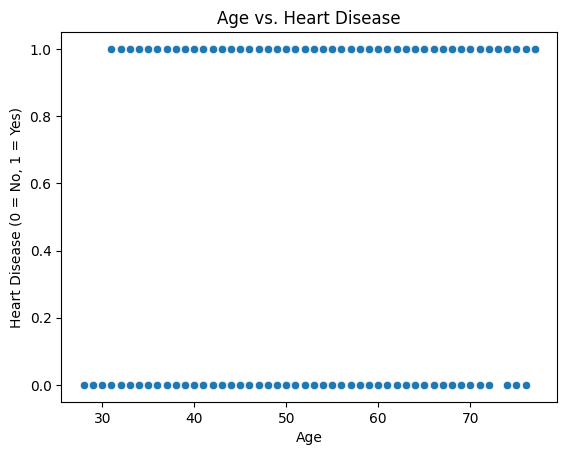

In [21]:
# Show age vs Heart Disease
sns.scatterplot(x='Age', y='HeartDisease', data=df)
plt.title('Age vs. Heart Disease')
plt.xlabel('Age')
plt.ylabel('Heart Disease (0 = No, 1 = Yes)')
plt.show()

There are people across all ages with Heart Disease, so this may not be the best attribute.

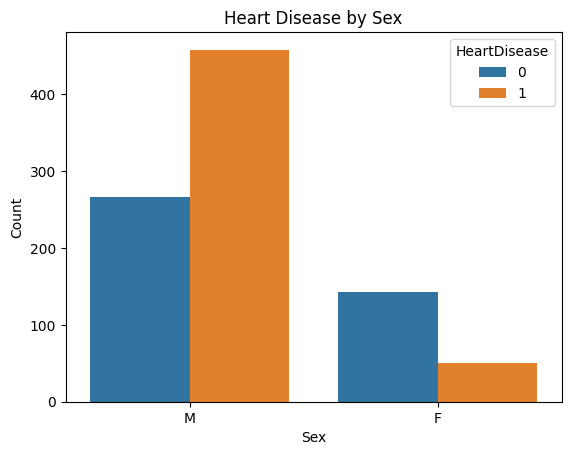

In [26]:
# Show the relation between Sex and Heart Disease
sns.countplot(x='Sex', hue='HeartDisease', data=df)
plt.title('Heart Disease by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

From this graph, it looks like men have a higher proportion of those with heart disease vs those without as compared to women.

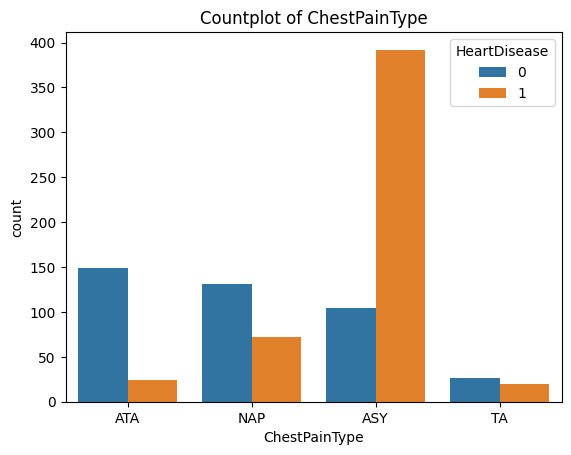

In [29]:
# Show count of Chest Pain with heart disease
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df)
plt.title("Countplot of ChestPainType")
plt.show()

From the graph above, it looks like people with chest pain type of ASY have a higher proportion of people with heart disease.

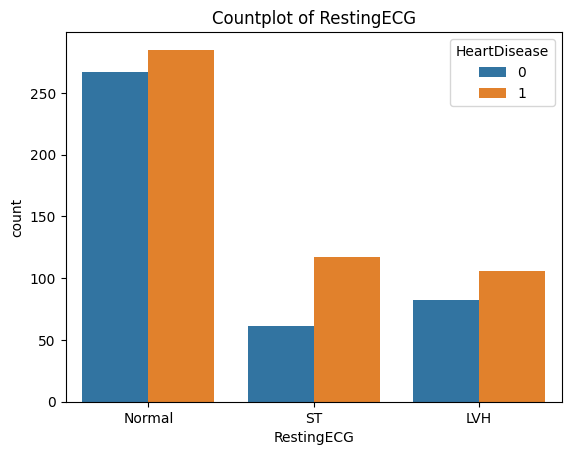

In [30]:
# Show relationship between resting ECG and heart disease
sns.countplot(x='RestingECG', hue='HeartDisease', data=df)
plt.title("Countplot of RestingECG")
plt.show()

Proportionally, resting ECG has larger proportion of heart disease for resting ECG of ST type.

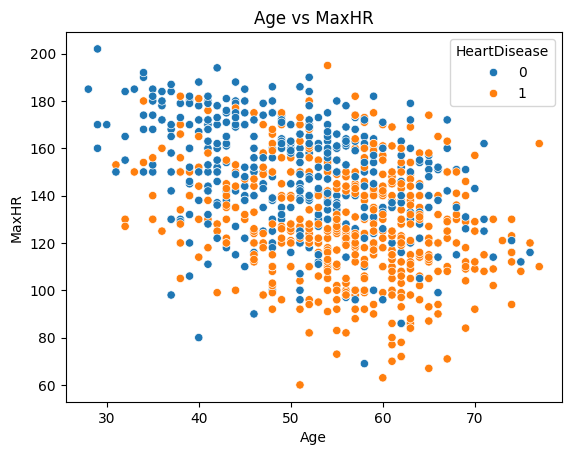

In [31]:
# Scatterplot of Age vs Max HR with Heart disease
sns.scatterplot(x='Age', y='MaxHR', hue='HeartDisease', data=df)
plt.title("Age vs MaxHR")
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.show()

From the plot, typically older people with a lower maximum heart rate have a higher number of people with heart disease, although it isn't a large distinction.

<function matplotlib.pyplot.show(close=None, block=None)>

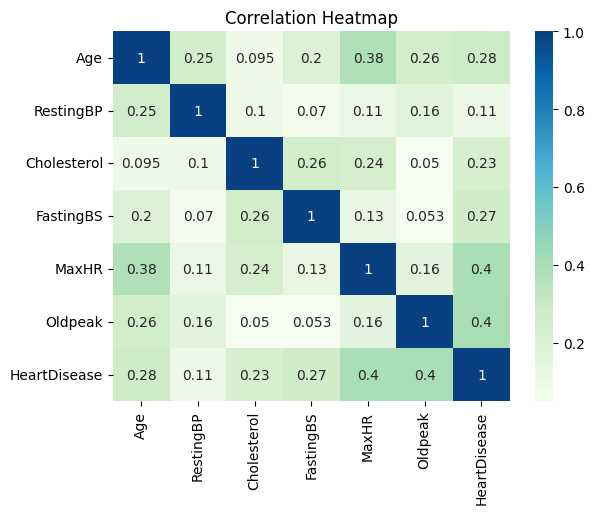

In [33]:
# Heatmap
sns.heatmap(df.corr(numeric_only=True).abs(), annot=True, cmap='GnBu')
#sns.heatmap(df.corr().abs(),annot=False, cmap='rocket_r')
plt.title('Correlation Heatmap')
plt.show

From the graph above, there are not a lot of correlation between attributes from this data.

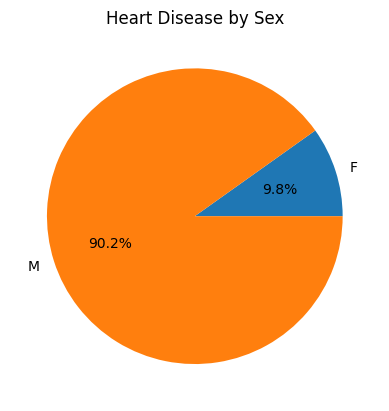

In [34]:
# Showing percentage of heart disease by sex
heart_disease_sex = df.groupby('Sex')['HeartDisease'].sum()
plt.pie(heart_disease_sex, labels=heart_disease_sex.index, autopct='%1.1f%%')
plt.title('Heart Disease by Sex')
plt.show()

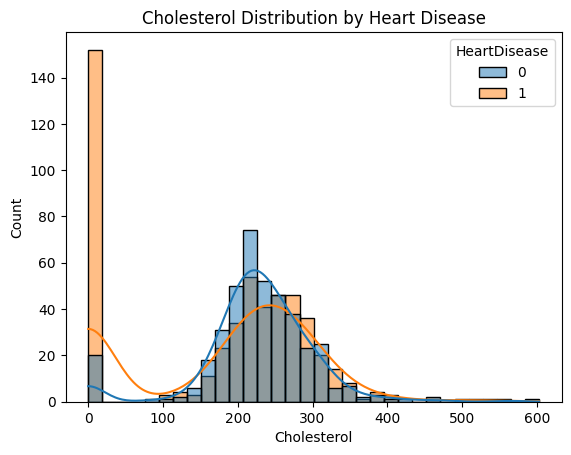

In [35]:
# Cholesterol distribution wiht hear disease
sns.histplot(data=df, x='Cholesterol', hue='HeartDisease', kde=True)
plt.title('Cholesterol Distribution by Heart Disease')
plt.show()

In [36]:
# Encode non-numeric values to be usable
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [37]:
scalar = MinMaxScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = scalar.fit_transform(df[num_cols])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1.0,0.333333,0.70,0.479270,0.0,0.5,0.788732,0.0,0.295455,1.0,0.0
1,0.428571,0.0,0.666667,0.80,0.298507,0.0,0.5,0.676056,0.0,0.409091,0.5,1.0
2,0.183673,1.0,0.333333,0.65,0.469320,0.0,1.0,0.267606,0.0,0.295455,1.0,0.0
3,0.408163,0.0,0.000000,0.69,0.354892,0.0,0.5,0.338028,1.0,0.465909,0.5,1.0
4,0.530612,1.0,0.666667,0.75,0.323383,0.0,0.5,0.436620,0.0,0.295455,1.0,0.0


In [52]:
# Perform EDA and use VIF

# Calculate VIF for each feature
X = df.drop('HeartDisease', axis=1)  # Assuming 'HeartDisease' is your target variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

# Determine features with high VIF (e.g., VIF > 5 or 10)
high_vif_features = vif_data[vif_data["VIF"] > 5]["feature"].tolist()

# Deal with multicollinearity
if high_vif_features:
    print("\nFeatures with high VIF:")
    print(high_vif_features)
    # Remove features with high VIF
    for feature in high_vif_features:
      X = X.drop(feature, axis = 1)
      vif_data = pd.DataFrame()
      vif_data["feature"] = X.columns
      vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
      print("\nVIF after removing", feature)
      print(vif_data)
      high_vif_features = vif_data[vif_data["VIF"] > 5]["feature"].tolist()
      if not high_vif_features:
        break
else:
    print("\nNo features with high VIF found.")

           feature        VIF
0              Age  10.464474
1              Sex   4.874489
2    ChestPainType   1.995371
3        RestingBP  37.655859
4      Cholesterol   5.217771
5        FastingBS   1.482195
6       RestingECG   3.549943
7            MaxHR  12.882395
8   ExerciseAngina   2.562183
9          Oldpeak  15.848423
10        ST_Slope   8.466800

Features with high VIF:
['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'ST_Slope']

VIF after removing Age
          feature        VIF
0             Sex   4.872949
1   ChestPainType   1.983973
2       RestingBP  30.253136
3     Cholesterol   5.216122
4       FastingBS   1.445922
5      RestingECG   3.545233
6           MaxHR  12.126416
7  ExerciseAngina   2.561147
8         Oldpeak  14.924923
9        ST_Slope   8.454803

VIF after removing RestingBP
          feature        VIF
0             Sex   4.644362
1   ChestPainType   1.960520
2     Cholesterol   4.946573
3       FastingBS   1.392254
4      RestingECG   3.368824


Implement Logistic Regression from scratch, including the vectorized implementation of
cost function and gradient descent.
Implement and compare the three gradient descent variants (e.g., batch gradient
descent, stochastic gradient descent, and mini-batch gradient descent). Explain their
convergence properties with respect to your cost function.


In [42]:
# Split data into the features X and target Y
#X = df.drop('HeartDisease', axis=1)
# Use X from after VIF
y = df['HeartDisease']

# Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [53]:
# Implement Logistic regression with vectorized implementation of cost function and gradient descent.
# Implement batch, stochastic and mini-batch gradient descent

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Binary Cross-Entroy Loss Function (same thing as log loss)
def logLoss(y_true, y_pred):
  eps = 1e-10
  loss = -np.mean( (y_true * np.log(y_pred + eps) + (1-y_true) * np.log(1-y_pred + eps)) )
  return loss

# Logistic Regression and Gradient Descent

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y, method='batch', batch_size=32,optimizer='sgd'):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Using optimization algorithms
        if optimizer == 'momentum':
            v_w = 0  # Initialize velocity for weights
            v_b = 0  # Initialize velocity for bias
            gamma = 0.9 # momentum parameter

        elif optimizer == 'rmsprop':
          v_w = 0 # Initialize squared gradients for weights
          v_b = 0 # Initialize squared gradients for bias
          beta = 0.9 # decay rate
          epsilon = 1e-8 # small constant
        elif optimizer == 'adam':
            m_w = 0
            v_w = 0
            m_b = 0
            v_b = 0
            beta1 = 0.9
            beta2 = 0.999
            epsilon = 1e-8
            t=0

        for _ in range(self.n_iters):
            # Implement each algorithm
            if method == 'batch':
                linear_pred = np.dot(X, self.weights) + self.bias
                predictions = sigmoid(linear_pred)
                dw = (1/n_samples) * np.dot(X.T, (predictions - y))
                db = (1/n_samples) * np.sum(predictions - y)
                # Use optimizing algorithms
                if optimizer == 'momentum':
                    v_w = gamma * v_w + self.lr*dw
                    v_b = gamma * v_b + self.lr*db
                    self.weights = self.weights - v_w
                    self.bias = self.bias - v_b
                elif optimizer == 'rmsprop':
                    v_w = beta * v_w + (1-beta)*dw**2
                    v_b = beta * v_b + (1-beta)*db**2
                    self.weights = self.weights - self.lr*dw/(np.sqrt(v_w)+epsilon)
                    self.bias = self.bias - self.lr*db/(np.sqrt(v_b)+epsilon)
                elif optimizer == 'adam':
                    t+=1
                    m_w = beta1 * m_w + (1-beta1)*dw
                    v_w = beta2 * v_w + (1-beta2)*dw**2

                    m_b = beta1 * m_b + (1-beta1)*db
                    v_b = beta2 * v_b + (1-beta2)*db**2

                    m_w_hat = m_w/(1-beta1**t)
                    v_w_hat = v_w/(1-beta2**t)
                    m_b_hat = m_b/(1-beta1**t)
                    v_b_hat = v_b/(1-beta2**t)
                    self.weights = self.weights - self.lr*m_w_hat/(np.sqrt(v_w_hat)+epsilon)
                    self.bias = self.bias - self.lr*m_b_hat/(np.sqrt(v_b_hat)+epsilon)
                else:
                    self.weights = self.weights - self.lr * dw
                    self.bias = self.bias - self.lr * db
            elif method == 'stochastic':
                for idx, x_i in enumerate(X):
                    linear_pred = np.dot(x_i, self.weights) + self.bias
                    y_pred = sigmoid(linear_pred)
                    dw = x_i * (y_pred - y[idx])
                    db = y_pred - y[idx]
                    self.weights = self.weights - self.lr * dw
                    self.bias = self.bias - self.lr * db
            elif method == 'mini-batch':
                for i in range(0, n_samples, batch_size):
                    X_batch = X[i:i + batch_size]
                    y_batch = y[i:i + batch_size]
                    linear_pred = np.dot(X_batch, self.weights) + self.bias
                    predictions = sigmoid(linear_pred)
                    dw = (1/batch_size) * np.dot(X_batch.T, (predictions - y_batch))
                    db = (1/batch_size) * np.sum(predictions - y_batch)
                    self.weights = self.weights - self.lr * dw
                    self.bias = self.bias - self.lr * db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

    # Used for hyperparameter tuning for Task 4
    def get_params(self, deep=True):
        return {"learning_rate": self.lr, "n_iters": self.n_iters}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self



In [57]:
# Train the model with Batch Gradient Descent, output accuracy, f1 score, precision and recall
log_reg = LogisticRegression(learning_rate=0.01, n_iters=1000)
log_reg.fit(X_train.values, y_train.values, method='batch')
y_pred = log_reg.predict(X_test.values)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision_batch = precision_score(y_test, y_pred)
recall_batch = recall_score(y_test, y_pred)
print(f"Accuracy (Batch GD): {accuracy}")
print(f"F1 Score (Batch GD): {f1}")
print(f"Precision (Batch GD): {precision_batch}")
print(f"Recall (Batch GD): {recall_batch}")
print("\n")

# Train the model with Stochastic Gradient Descent, output accuracy, f1 score, precision and recall
log_reg_stochastic = LogisticRegression(learning_rate=0.01, n_iters=1000)
log_reg_stochastic.fit(X_train.values, y_train.values, method='stochastic')
y_pred_stochastic = log_reg_stochastic.predict(X_test.values)
accuracy_stochastic = accuracy_score(y_test, y_pred_stochastic)
f1_stochastic = f1_score(y_test, y_pred_stochastic)
precision_stochastic = precision_score(y_test, y_pred_stochastic)
recall_stochastic = recall_score(y_test, y_pred_stochastic)
print(f"Accuracy (Stochastic GD): {accuracy_stochastic}")
print(f"F1 Score (Stochastic GD): {f1_stochastic}")
print(f"Precision (Stochastic GD): {precision_stochastic}")
print(f"Recall (Stochastic GD): {recall_stochastic}")
print("\n")

# Train the model with Mini-Batch Gradient Descent, output accuracy, f1 score, precision and recall
log_reg_mini_batch = LogisticRegression(learning_rate=0.01, n_iters=1000)
log_reg_mini_batch.fit(X_train.values, y_train.values, method='mini-batch')
y_pred_mini_batch = log_reg_mini_batch.predict(X_test.values)
accuracy_mini_batch = accuracy_score(y_test, y_pred_mini_batch)
f1_mini_batch = f1_score(y_test, y_pred_mini_batch)
precision_mini_batch = precision_score(y_test, y_pred_mini_batch)
recall_mini_batch = recall_score(y_test, y_pred_mini_batch)
print(f"Accuracy (Mini-Batch GD): {accuracy_mini_batch}")
print(f"F1 Score (Mini-Batch GD): {f1_mini_batch}")
print(f"Precision (Mini-Batch GD): {precision_mini_batch}")
print(f"Recall (Mini-Batch GD): {recall_mini_batch}")
print("\n")

# Train the model using the momentum optimizer
log_reg_momentum = LogisticRegression(learning_rate=0.01, n_iters=1000)
log_reg_momentum.fit(X_train.values, y_train.values, method='batch', optimizer='momentum')
y_pred_momentum = log_reg_momentum.predict(X_test.values)
accuracy_momentum = accuracy_score(y_test, y_pred_momentum)
f1_momentum = f1_score(y_test, y_pred_momentum)
precision_momentum = precision_score(y_test, y_pred_momentum)
recall_momentum = recall_score(y_test, y_pred_momentum)
print(f"Accuracy (Momentum): {accuracy_momentum}")
print(f"F1 Score (Momentum): {f1_momentum}")
print(f"Precision (Momentum): {precision_momentum}")
print(f"Recall (Momentum): {recall_momentum}")
print("\n")

# Train the model using RMSprop optimizer
log_reg_rmsprop = LogisticRegression(learning_rate=0.01, n_iters=1000)
log_reg_rmsprop.fit(X_train.values, y_train.values, method='batch', optimizer='rmsprop')
y_pred_rmsprop = log_reg_rmsprop.predict(X_test.values)
accuracy_rmsprop = accuracy_score(y_test, y_pred_rmsprop)
f1_rmsprop = f1_score(y_test, y_pred_rmsprop)
precision_rmsprop = precision_score(y_test, y_pred_rmsprop)
recall_rmsprop = recall_score(y_test, y_pred_rmsprop)
print(f"Accuracy (RMSprop): {accuracy_rmsprop}")
print(f"F1 Score (RMSprop): {f1_rmsprop}")
print(f"Precision (RMSprop): {precision_rmsprop}")
print(f"Recall (RMSprop): {recall_rmsprop}")
print("\n")

#Train the model using Adam
log_reg_adam = LogisticRegression(learning_rate=0.01, n_iters=1000)
log_reg_adam.fit(X_train.values, y_train.values, method='batch', optimizer='adam')
y_pred_adam = log_reg_adam.predict(X_test.values)
accuracy_adam = accuracy_score(y_test, y_pred_adam)
f1_adam = f1_score(y_test, y_pred_adam)
precision_adam = precision_score(y_test, y_pred_adam)
recall_adam = recall_score(y_test, y_pred_adam)
print(f"Accuracy (Adam): {accuracy_adam}")
print(f"F1 Score (Adam): {f1_adam}")
print(f"Precision (Adam): {precision_adam}")
print(f"Recall (Adam): {recall_adam}")


Accuracy (Batch GD): 0.8206521739130435
F1 Score (Batch GD): 0.8436018957345972
Precision (Batch GD): 0.8557692307692307
Recall (Batch GD): 0.8317757009345794


Accuracy (Stochastic GD): 0.842391304347826
F1 Score (Stochastic GD): 0.8557213930348259
Precision (Stochastic GD): 0.9148936170212766
Recall (Stochastic GD): 0.8037383177570093


Accuracy (Mini-Batch GD): 0.842391304347826
F1 Score (Mini-Batch GD): 0.8599033816425121
Precision (Mini-Batch GD): 0.89
Recall (Mini-Batch GD): 0.8317757009345794


Accuracy (Momentum): 0.8260869565217391
F1 Score (Momentum): 0.8461538461538461
Precision (Momentum): 0.8712871287128713
Recall (Momentum): 0.822429906542056


Accuracy (RMSprop): 0.8586956521739131
F1 Score (RMSprop): 0.8725490196078431
Precision (RMSprop): 0.9175257731958762
Recall (RMSprop): 0.8317757009345794


Accuracy (Adam): 0.8586956521739131
F1 Score (Adam): 0.8725490196078431
Precision (Adam): 0.9175257731958762
Recall (Adam): 0.8317757009345794


In general, we would expect the optimization algorithms to improve performance, but since this dataset is not extremely large, there was not a significant difference between the statistics when using these optimizers as compared with stochastic gradient descent.

Overall, all the algorithms had fairly accurate results all having statistics in the 0.8-0.9 range.

In [58]:
# Perform hyperparameter tuning using GridSearchCV

# Initialize different values to test
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'n_iters': [500, 1000, 2000],
}

# Perform GridSearchCV for each optimizer
optimizers = ['sgd', 'momentum', 'rmsprop', 'adam']
for optimizer in optimizers:
    print(f"Tuning for optimizer: {optimizer}")
    log_reg = LogisticRegression()
    grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train.values, y_train.values, method='batch', optimizer=optimizer)
    print(f"Best hyperparameters for {optimizer}: {grid_search.best_params_}")
    print(f"Best accuracy score for {optimizer}: {grid_search.best_score_}")
    # Evaluate the best model on the test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test.values)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"Test accuracy for {optimizer}: {accuracy}")
    print(f"Test F1 score for {optimizer}: {f1}")
    print(f"Test precision for {optimizer}: {precision}")
    print(f"Test recall for {optimizer}: {recall}")
    print("\n")

Tuning for optimizer: sgd
Best hyperparameters for sgd: {'learning_rate': 0.001, 'n_iters': 2000}
Best accuracy score for sgd: 0.8364924051812505
Test accuracy for sgd: 0.8206521739130435
Test F1 score for sgd: 0.8436018957345972
Test precision for sgd: 0.8557692307692307
Test recall for sgd: 0.8317757009345794


Tuning for optimizer: momentum
Best hyperparameters for momentum: {'learning_rate': 0.001, 'n_iters': 2000}
Best accuracy score for momentum: 0.8460068959090485
Test accuracy for momentum: 0.8369565217391305
Test F1 score for momentum: 0.8557692307692307
Test precision for momentum: 0.8811881188118812
Test recall for momentum: 0.8317757009345794


Tuning for optimizer: rmsprop
Best hyperparameters for rmsprop: {'learning_rate': 0.001, 'n_iters': 500}
Best accuracy score for rmsprop: 0.8460068959090485
Test accuracy for rmsprop: 0.8586956521739131
Test F1 score for rmsprop: 0.8725490196078431
Test precision for rmsprop: 0.9175257731958762
Test recall for rmsprop: 0.831775700934

## Conclude by discussing the practical trade-offs of the algorithms, including computational complexity, interpretability, and suitability for large-scale datasets

All of the variations of the gradient descent algorithm have a decent complexity as it is logistic regression. However, they have different benefits and drawbacks. For example, for batch gradient descent, the gradient is computed using the whole dataset in each iteration. This allows for stable convergence, but is more expensive in terms of time complexity, especially for larger datasets. Stochastic gradient descent is faster for each iteration since it does not use the whole dataset in each iteration. However, this makes it take longer to converge. Mini-batch gradient descent is a middle ground between the other two algorithms in that it uses a small random subset of the data for the gradient calculation as opposed to the whole dataset or only a single point. This balances the benefits and drawbacks of the other two methods.

In general, optimizers improve the convergence rate and stability of gradient descent. With this dataset, the optimizers might have improved the results somewhat, but it likely would have been more effective with a larger dataset.

These algorithms are interpretable. It is easy to see how they are used to tackle the given machine learning problems.

For large datasets, stochastic gradience descent and mini-batch gradient descent are better since they have a lower computational cost at each iteration because they are not using the entire dataset to update the gradient.

Optimizers can help deal with some of the drawbacks of these algorithms, like convergence, and they can help boost training speed and performance, especially with larger datasets.

In general, the dataset I used was not extremely large, so there weren't very clear differences between some of the algorithms. However, the overall accuracy of this model for this dataset was decent, with accuracies in the 0.8-0.9 range for most methods. The relative smaller size of the dataset likely accounted for many of the algorithms having similar result statistics. In the future, I would likely try to find a larger dataset to better evaluate the differences between the methods.
